<a href="https://colab.research.google.com/github/CHANDNI1000/Outlier-detection-using-AR-model/blob/main/Outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.ar_model as ar_model
import statsmodels as sm
%matplotlib inline

Below code generates AR time series for sample size of 200 and fits the model. 

[ 0.07288268  0.2834343  -0.58955614]


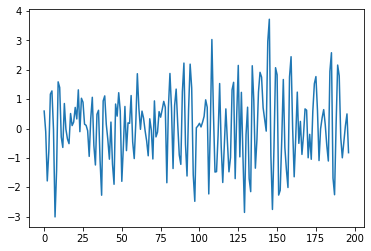

In [3]:
Sample_size = 200
w = np.random.normal(0, 1, size=(Sample_size))
x = w.copy()

for i in range(1,Sample_size -1):
  
  x[i+1] = 0.2*x[i] - 0.6* x[i-1]  + w[i]

plt.plot(x[3:])

ar = ar_model.AR(x)
model_ar = ar.fit(method='mle',maxlag=2)
print(model_ar.params)

Text(0.5, 1.0, 'Fit vs Actual')

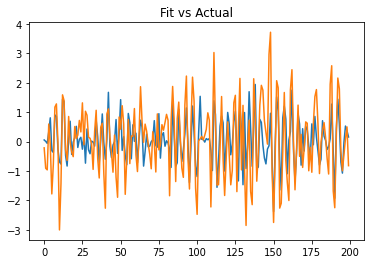

In [4]:
pred = model_ar.predict()
plt.plot(pred)
plt.plot(x)
plt.title("Fit vs Actual")

To add noise, we need to randomly choose where we wll add noise. Below code generate uniformly random points where noise will be added 

In [5]:
np.random.seed(123)
rands = np.random.uniform(size = 12)
var_selected = [int(x) for x in (70 * rands + 110)]
print(var_selected)

[158, 130, 125, 148, 160, 139, 178, 157, 143, 137, 134, 161]


Once location of data points are selected, data points will be multiplied by 1.25( selected randomly) and add 3.5 (multiplied by sign of the number as numbers generated are positive and negative).

In [6]:
rand_value = np.random.normal(size = 12)
new_value = rand_value *1.25 + 3.5*np.sign(rand_value)
X_damaged = x.copy()
for values,elem in zip(new_value, var_selected):
  X_damaged[elem] = values 
X_damaged[[y for y in var_selected]]

array([-4.34860769, -3.61838621,  5.36423703, -4.2986275 , -4.05497745,
       -4.04293909,  6.2574126 ,  6.23348261,  4.75506737,  3.982733  ,
        4.42171072,  5.36341504])

In [7]:
old_posi = [y for y in range(Sample_size) if y not in var_selected ]
original_value = [x[y] for y in old_posi ]
print(original_value)
#print(len(ix_clean),len(val_clean))

[-0.2125646491188612, -0.9084255067078914, -0.9625718185781529, 0.5968350522894087, -0.10679527443484849, -1.782086630235169, -0.7629457472840591, 1.1736434229663097, 1.2827782429761787, -0.022686011313194587, -3.007389420824292, -1.423633828515196, 1.5915203972870784, 1.397968099447513, -0.28564218268186164, -0.641537541576543, 0.8543446123541423, -0.020620615789560537, -0.35450096869320213, -0.5126561891932493, 0.5130708972010609, 0.10255129159506582, 0.2219888476930446, 0.7206324210227267, 0.3287509482191444, 1.3187497541092996, -0.10508169525611111, 1.032876259092565, 0.897796527307841, 0.14947657072031417, 0.11165765976960884, -0.07190196643070369, -0.946323303119922, 0.3473396205762569, 1.0658250361487713, -0.5719127759640641, -1.2392640330271265, 0.48590898594910725, 0.6237054070747408, -1.0841279597464, -2.2683856505668176, 0.9424063107350588, 1.1133705825231255, 0.14516325718432632, -0.37578915198109364, -1.0420907473011862, 0.22209036147216152, -1.2130814806621038, -1.8963474

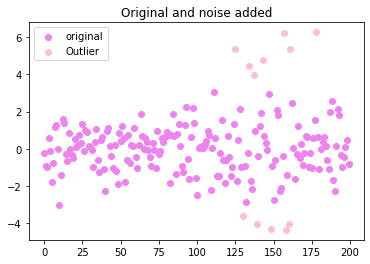

In [8]:
plt.scatter(old_posi,original_value,color = 'violet',label = "original")
plt.scatter(var_selected,new_value,color = 'pink',label = "Outlier")
plt.title("Original and noise added")
plt.legend()

Below code is used to detect outlier and calculate MSE

46.300703041346324

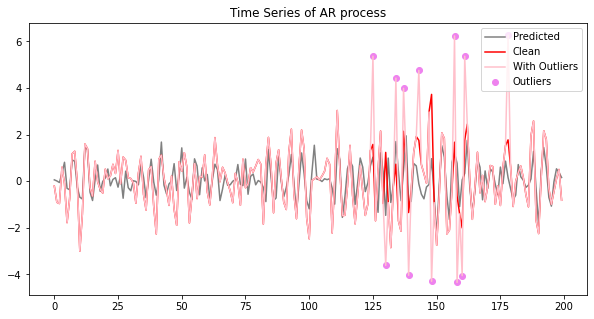

In [9]:
pred = model_ar.predict()
plt.figure(figsize=(10,5))
plt.plot(pred,color = "grey" ,label = "Predicted")
plt.plot(x,color = "red",label="Clean")
plt.plot(X_damaged,color = "pink",label="With Outliers")
plt.scatter(var_selected,X_damaged[var_selected],color = 'violet',label = "Outliers")
plt.legend(loc ="upper right")
plt.title("Time Series of AR process")
np.sum(np.abs(X_damaged-x))

Text(0.5, 1.0, 'plotting outlier')

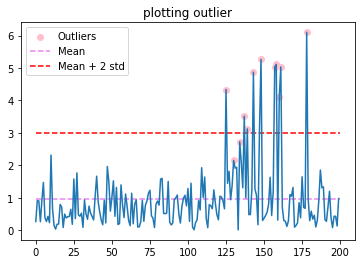

In [11]:
score = np.sqrt((X_damaged-pred)**2)

plt.plot(score)
plt.scatter(var_selected,score[var_selected],color = 'pink',label = "Outliers")
plt.hlines(np.mean(score),0,200,linestyles='--',color="violet",label = "Mean")
plt.hlines(np.mean(score)+2*np.std(score),0,200,linestyles='--',color="red",label = "Mean + 2 std")

plt.legend(loc="upper left")
plt.title("plotting outlier")